<a href="https://colab.research.google.com/github/dtran556/asdfasdfa/blob/main/text_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Foward Diffusion
Grab an image and then iteratively add more noise to the image until the image is fully noisy.

Backwards Diffusion
Grab an image and then iteratively reduce noise until the noisy image is pure.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers import DDPMScheduler
from PIL import Image
import torchvision.transforms as transforms
from datasets import load_dataset
from torch.utils.data import DataLoader
maxSteps = 1000
noiseScheduler = DDPMScheduler(num_train_timesteps=maxSteps,
                               beta_start=0.001,
                               beta_end=0.02)

def load_img():
    image_path = "/content/Sloth-RF.jpg"
    image = Image.open(image_path).convert('RGB')

    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ])

    return transform(image).numpy()

def plot_images(timesteps, images, title="Images"):
    fig, axes = plt.subplots(1, len(timesteps), figsize=(15, 3))
    for i, (t, img) in enumerate(zip(timesteps, images)):
        img_display = np.transpose(img, (1, 2, 0))
        img_display = np.clip(img_display, 0, 1)
        axes[i].imshow(img_display)
        axes[i].set_title(f"t={t}")
        axes[i].axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

image = torch.tensor(load_img())
forward_timesteps = torch.arange(0, maxSteps, maxSteps // 10)
print(f"Forward timesteps: {forward_timesteps}")

noise = torch.randn(image.shape)
noisyImage = noiseScheduler.add_noise(
    image.unsqueeze(0),
    noise.unsqueeze(0),
    forward_timesteps.unsqueeze(0)
).squeeze(0).numpy()

plot_images(forward_timesteps, noisyImage, "Forward Diffusion")

KeyboardInterrupt: 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers import DDPMScheduler
from PIL import Image
import torchvision.transforms as transforms
from datasets import load_dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

img_align+identity+attr/train-00000-of-0(…):   0%|          | 0.00/500M [00:00<?, ?B/s]

img_align+identity+attr/train-00001-of-0(…):   0%|          | 0.00/498M [00:00<?, ?B/s]

img_align+identity+attr/train-00002-of-0(…):   0%|          | 0.00/494M [00:00<?, ?B/s]

img_align+identity+attr/train-00003-of-0(…):   0%|          | 0.00/490M [00:00<?, ?B/s]

img_align+identity+attr/train-00004-of-0(…):   0%|          | 0.00/494M [00:00<?, ?B/s]

img_align+identity+attr/train-00005-of-0(…):   0%|          | 0.00/503M [00:00<?, ?B/s]

img_align+identity+attr/train-00006-of-0(…):   0%|          | 0.00/494M [00:00<?, ?B/s]

img_align+identity+attr/train-00007-of-0(…):   0%|          | 0.00/493M [00:00<?, ?B/s]

img_align+identity+attr/train-00008-of-0(…):   0%|          | 0.00/497M [00:00<?, ?B/s]

img_align+identity+attr/train-00009-of-0(…):   0%|          | 0.00/503M [00:00<?, ?B/s]

img_align+identity+attr/train-00010-of-0(…):   0%|          | 0.00/498M [00:00<?, ?B/s]

img_align+identity+attr/train-00011-of-0(…):   0%|          | 0.00/501M [00:00<?, ?B/s]

img_align+identity+attr/train-00012-of-0(…):   0%|          | 0.00/494M [00:00<?, ?B/s]

img_align+identity+attr/train-00013-of-0(…):   0%|          | 0.00/504M [00:00<?, ?B/s]

img_align+identity+attr/train-00014-of-0(…):   0%|          | 0.00/490M [00:00<?, ?B/s]

img_align+identity+attr/train-00015-of-0(…):   0%|          | 0.00/489M [00:00<?, ?B/s]

img_align+identity+attr/train-00016-of-0(…):   0%|          | 0.00/498M [00:00<?, ?B/s]

img_align+identity+attr/train-00017-of-0(…):   0%|          | 0.00/489M [00:00<?, ?B/s]

img_align+identity+attr/train-00018-of-0(…):   0%|          | 0.00/489M [00:00<?, ?B/s]

img_align+identity+attr/valid-00000-of-0(…):   0%|          | 0.00/388M [00:00<?, ?B/s]

img_align+identity+attr/valid-00001-of-0(…):   0%|          | 0.00/385M [00:00<?, ?B/s]

img_align+identity+attr/valid-00002-of-0(…):   0%|          | 0.00/384M [00:00<?, ?B/s]

img_align+identity+attr/test-00000-of-00(…):   0%|          | 0.00/391M [00:00<?, ?B/s]

img_align+identity+attr/test-00001-of-00(…):   0%|          | 0.00/384M [00:00<?, ?B/s]

img_align+identity+attr/test-00002-of-00(…):   0%|          | 0.00/383M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/162770 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/19867 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/19962 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/19 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

data/train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

data/train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

data/train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

data/train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

data/train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

data/validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

data/validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

data/validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3680 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3669 [00:00<?, ? examples/s]

Combined dataset: 176450 total images
Sample images from combined dataset:


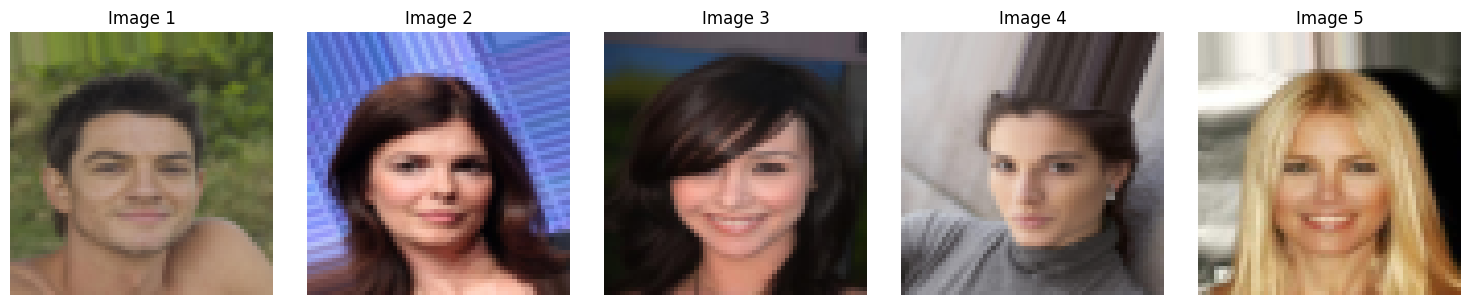

Combined dataset ready for training!


In [3]:
celeb_dataset = load_dataset("flwrlabs/celeba", split="train")
food_dataset = load_dataset("ethz/food101", split="train[:10000]")
pets_dataset = load_dataset("timm/oxford-iiit-pet", split="train")


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

class CombinedDataset(torch.utils.data.Dataset):
    def __init__(self, celeb_data,  food_data, pets_data, transform=None):
        self.celeb_data = celeb_data

        self.food_data = food_data
        self.pets_data = pets_data

        self.transform = transform

        self.celeb_len = len(celeb_data)

        self.food_len = len(food_data)
        self.pets_len = len(pets_data)

        self.total_len = self.celeb_len  + self.food_len + self.pets_len

    def __len__(self):
        return self.total_len


    def __getitem__(self, idx):
        if idx < self.celeb_len:
            item = self.celeb_data[idx]
            image = item['image']
        elif idx < self.celeb_len + self.food_len:
             item = self.food_data[idx - self.celeb_len ]
             image = item['image']
        else:
          item = self.celeb_len  + self.food_len + self.pets_len
          image = item['image']

        if self.transform:
            image = self.transform(image)

        return image

combined_dataset = CombinedDataset(celeb_dataset,  food_dataset, pets_dataset, transform=transform)
dataloader = DataLoader(combined_dataset, batch_size=1, shuffle=True)

print(f"Combined dataset: {len(combined_dataset)} total images")

print("Sample images from combined dataset:")
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, image in enumerate(dataloader):
    if i >= 5:
        break

    img_display = image.squeeze(0).numpy()
    img_display = np.transpose(img_display, (1, 2, 0))
    img_display = np.clip(img_display, 0, 1)

    axes[i].imshow(img_display)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
print("Combined dataset ready for training!")

In [4]:
class SimpleUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)

        self.time_embed = nn.Linear(1, 256)

        self.upconv1 = nn.Conv2d(256, 128, 3, padding=1)

        self.upconv2 = nn.Conv2d(128, 64, 3, padding=1)
        self.out = nn.Conv2d(64, 3, 3, padding=1)

    def forward(self, x, timestep):
        # Downsampling
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))

        # Time embedding
        t_emb = self.time_embed(timestep.float().unsqueeze(-1))
        t_emb = t_emb.view(-1, 256, 1, 1)
        x = x + t_emb

        # Upsampling
        x = torch.relu(self.upconv1(x))
        x = torch.relu(self.upconv2(x))
        x = self.out(x)

        return x

In [5]:
maxSteps = 1000
noiseScheduler = DDPMScheduler(num_train_timesteps=maxSteps,
                               beta_start=0.001,
                               beta_end=0.02)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")



unet_model = SimpleUNet().to(device)
optimizer = Adam(unet_model.parameters(), lr=1e-4)


max_timesteps = 1000
num_epochs = 25
batch_size = 128

print("Starting training...")
print(f"Model parameters: {sum(p.numel() for p in unet_model.parameters()):,}")

for epoch in range(num_epochs):
    epoch_loss = 0
    num_batches = 0

    for batch_idx, images in enumerate(dataloader):
        # Load Data
        images = images.to(device)
        img_shape = images.shape  # [Batch Size, Num Channels, W, H]

        # Run augmentations (simple random horizontal flip)
        if torch.rand(1) > 0.5:
            images = torch.flip(images, dims=[3])

        # Forward Diffusion
        # Generate Random Noise for Random timesteps
        timesteps = torch.randint(0, max_timesteps, (len(images),)).to(device)
        noise = torch.randn(img_shape).to(device)

        # Add noise to images
        noisy_images = noiseScheduler.add_noise(images, noise, timesteps)

        # UNet Forward Pass
        prediction = unet_model(noisy_images, timesteps)

        # Calculate Loss
        loss = F.mse_loss(prediction, noise)

        # Update Weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    print(f"Epoch {epoch+1} completed. Average Loss: {avg_loss:.4f}")

print("Training completed!")
torch.save(unet_model.state_dict(), 'genImage25epoch.pth')
torch.save({
    'model_state_dict': unet_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': num_epochs,
    'loss': avg_loss
},'trained_unet_path.pth')

print("Model Saved")

Using device: cuda
GPU: NVIDIA L4
GPU Memory: 23.8 GB
Starting training...
Model parameters: 741,891


TypeError: 'int' object is not subscriptable

In [ ]:
unet_model = SimpleUNet().to(device)
unet_model.load_state_dict(torch.load('genImage25epoch.pth'))
unet_model.eval()

In [ ]:
maxSteps = 1000
noiseScheduler = DDPMScheduler(num_train_timesteps=maxSteps,
                               beta_start=0.001,
                               beta_end=0.02)
def genImage(model,num_images = 5):
  model.eval()
  with torch.no_grad():
    noise = torch.rand(num_images, 3, 64, 64).to(device)
    for i in reversed(range(max_timesteps)):
      timestep = torch.full((num_images,), i, device = device)
      predicted_noise = model(noise, timestep)
      noise = noiseScheduler.step(predicted_noise, i, noise).prev_sample
    return noise.cpu().numpy()
def plot_images(timesteps, images, title="Images"):
    fig, axes = plt.subplots(1, len(timesteps), figsize=(15, 3))
    for i, (t, img) in enumerate(zip(timesteps, images)):
        img_display = np.transpose(img, (1, 2, 0))
        img_display = np.clip(img_display, 0, 1)
        axes[i].imshow(img_display)
        axes[i].set_title(f"t={t}")
        axes[i].axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
generated = genImage(unet_model, 5)
print(generated.shape)
plot_images = (range(5), generated, "Generated Images")